Las fuentes consultadas fueron, lo desarrollado en clase, la documentación de las librerías utilizadas y materiales de la plataforma Coding Dojo

In [6]:
import numpy as np
import pandas as pd
import json

In [45]:
# Carga el dataset 
df = pd.read_csv('C:/Users/GIGABYTE/Documents/examen_data_fundamentals/data/video_juegos_sales.csv')
print(df.shape)
#df.head()

(64016, 14)


In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB
None


In [47]:
# Para ver valores nulos en formato df ---> hecha en clase
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
critic_score,6678,57338,89.57
jp_sales,6726,57290,89.49
na_sales,12637,51379,80.26
pal_sales,12824,51192,79.97
other_sales,15128,48888,76.37
last_update,17879,46137,72.07
total_sales,18922,45094,70.44
release_date,56965,7051,11.01
developer,63999,17,0.03
publisher,64016,0,0.00


In [48]:
# Comprobar duplicados considerando 'title' y 'console'
duplicates = df.duplicated(subset=['title', 'console']).sum()
print(f"Número de registros duplicados (por título y consola): {duplicates}")

# Elimina duplicados
df.drop_duplicates(subset=['title', 'console'], inplace=True)

Número de registros duplicados (por título y consola): 225


In [49]:
# Normalizar la columna 'genre'
df['genre'] = df['genre'].str.lower()  # convertir valores de las columnas a minuscula
print(df['genre'].unique())  # Verificar valores únicos

['action' 'shooter' 'action-adventure' 'sports' 'role-playing'
 'simulation' 'racing' 'music' 'misc' 'fighting' 'platform' 'adventure'
 'strategy' 'puzzle' 'mmo' 'sandbox' 'party' 'education' 'board game'
 'visual novel']


In [50]:
# Convertir 'critic_score' y 'total_sales'
df['critic_score'] = df['critic_score'].astype(float)
df['total_sales'] = df['total_sales'].astype(float)

# Muestra los tipos de datos obtenidos
print(df.dtypes)

img              object
title            object
console          object
genre            object
publisher        object
developer        object
critic_score    float64
total_sales     float64
na_sales        float64
jp_sales        float64
pal_sales       float64
other_sales     float64
release_date     object
last_update      object
dtype: object


In [52]:
# Ver valores nulos
print("Valores nulos por columna:\n", df.isnull().sum())

# Rellena critic_score con la media
df['critic_score'] = df['critic_score'].fillna(df['critic_score'].mean())

# Rellena valores faltantes en 'release_date' con 'Unknown' --->'Desconocido'
df['release_date'] = df['release_date'].fillna('Unknown')

# Rellena otros valores nulos
df['developer'] = df['developer'].fillna('Unknown')
df['na_sales'] = df['na_sales'].fillna(0)
df['jp_sales'] = df['jp_sales'].fillna(0)
df['pal_sales'] = df['pal_sales'].fillna(0)
df['other_sales'] = df['other_sales'].fillna(0)
df['last_update'] = df['last_update'].fillna('Unknown')

# Confirma que no hay más valores nulos
print("Valores nulos después del manejo:\n", df.isnull().sum())


Valores nulos por columna:
 img                 0
title               0
console             0
genre               0
publisher           0
developer           0
critic_score        0
total_sales     44931
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
release_date        0
last_update         0
dtype: int64
Valores nulos después del manejo:
 img                 0
title               0
console             0
genre               0
publisher           0
developer           0
critic_score        0
total_sales     44931
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
release_date        0
last_update         0
dtype: int64


In [53]:
#Detención y eliminación de datos anómalos
anomalies = df[df['total_sales'] < 0]
print("Datos anómalos encontrados:\n", anomalies)

df = df[df['total_sales'] >= 0]

Datos anómalos encontrados:
 Empty DataFrame
Columns: [img, title, console, genre, publisher, developer, critic_score, total_sales, na_sales, jp_sales, pal_sales, other_sales, release_date, last_update]
Index: []


In [54]:
# Ver valores nulos
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
img,18860,0,0.0
title,18860,0,0.0
console,18860,0,0.0
genre,18860,0,0.0
publisher,18860,0,0.0
developer,18860,0,0.0
critic_score,18860,0,0.0
total_sales,18860,0,0.0
na_sales,18860,0,0.0
jp_sales,18860,0,0.0


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

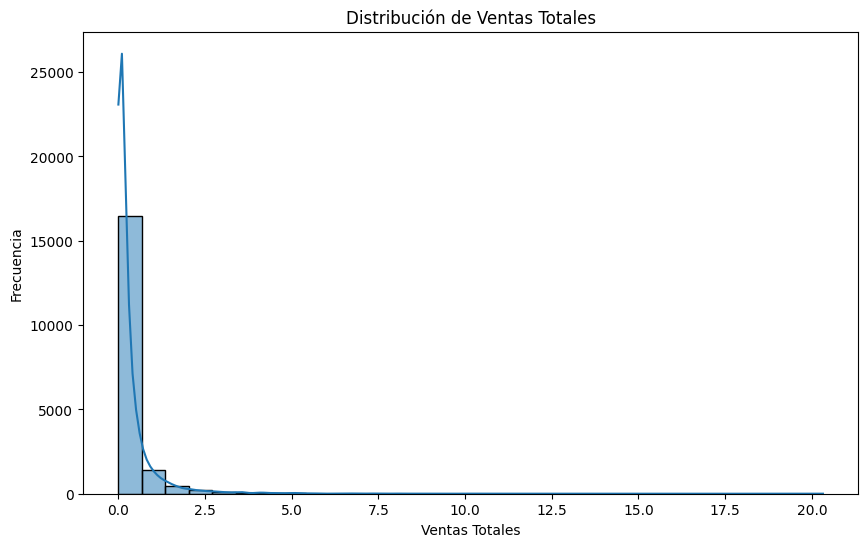

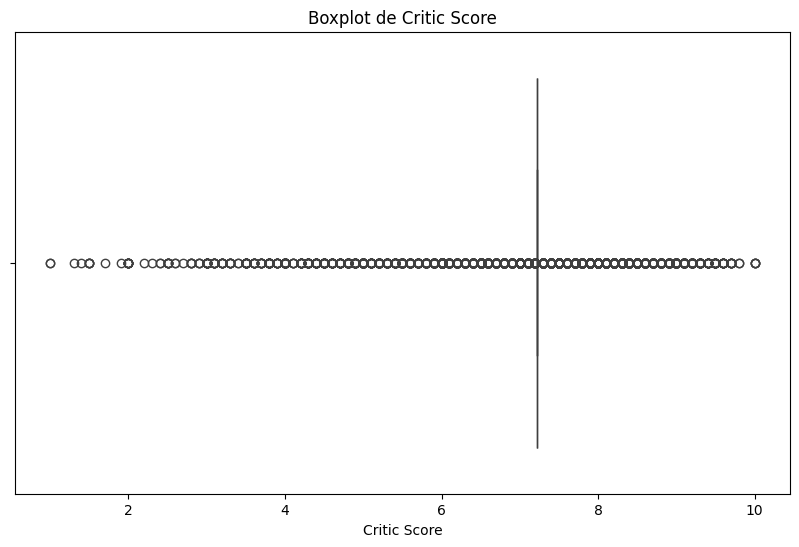

In [39]:
# Visualización del histograma para total_sales
plt.figure(figsize=(10, 6))
sns.histplot(df['total_sales'], bins=30, kde=True)
plt.title('Distribución de Ventas Totales')
plt.xlabel('Ventas Totales')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de caja para critic_score
plt.figure(figsize=(10, 6))
sns.boxplot(x='critic_score', data=df)
plt.title('Boxplot de Critic Score')
plt.xlabel('Critic Score')
plt.show()

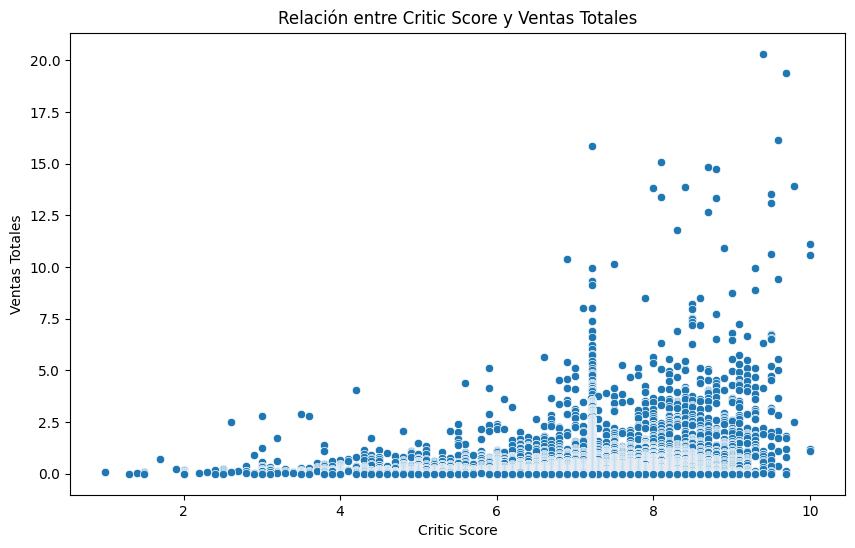

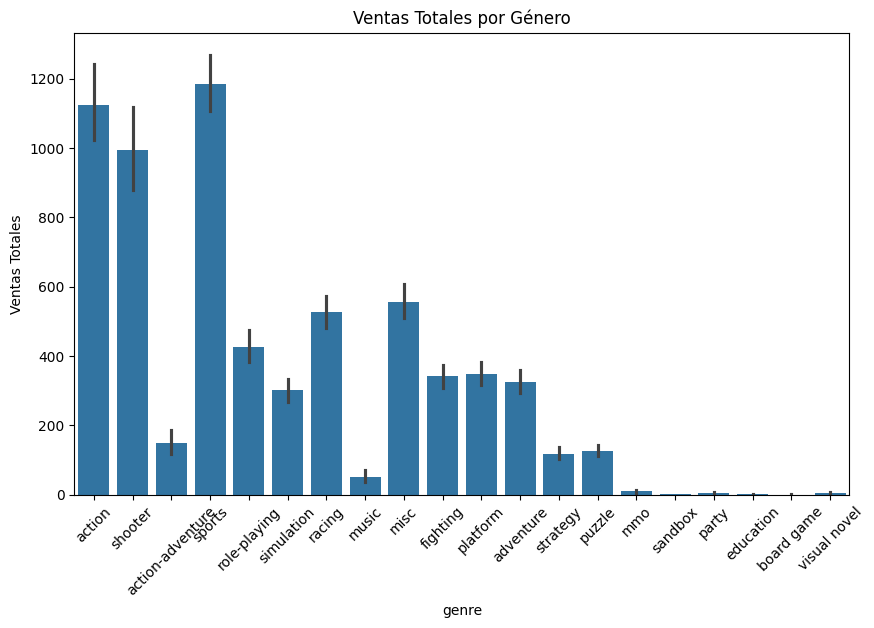

In [40]:
# Gráfico de dispersión entre total_sales y critic_score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=df)
plt.title('Relación entre Critic Score y Ventas Totales')
plt.xlabel('Critic Score')
plt.ylabel('Ventas Totales')
plt.show()

# Gráfico de barras para ventas por género
plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='total_sales', data=df, estimator=sum)
plt.title('Ventas Totales por Género')
plt.xticks(rotation=45)
plt.ylabel('Ventas Totales')
plt.show()


In [41]:
# Estadísticas descriptivas
print(df.describe())

       critic_score   total_sales      na_sales      jp_sales     pal_sales  \
count  18860.000000  18860.000000  18860.000000  18860.000000  18860.000000   
mean       7.193796      0.349750      0.177286      0.036167      0.101551   
std        0.673833      0.808457      0.423717      0.110882      0.331198   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.219404      0.030000      0.000000      0.000000      0.000000   
50%        7.219404      0.120000      0.050000      0.000000      0.010000   
75%        7.219404      0.350000      0.170000      0.020000      0.070000   
max       10.000000     20.320000      9.760000      2.130000      9.850000   

        other_sales  
count  18860.000000  
mean       0.034507  
std        0.114712  
min        0.000000  
25%        0.000000  
50%        0.010000  
75%        0.020000  
max        3.120000  


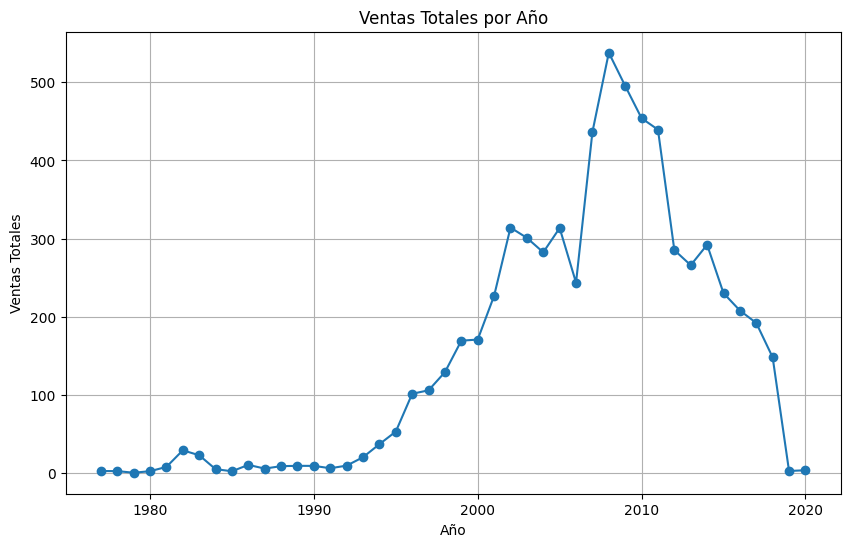

In [42]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Agrupa por año y sumar las ventas totales
df['year'] = df['release_date'].dt.year
sales_by_year = df.groupby('year')['total_sales'].sum().reset_index()

# Grafica
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year['year'], sales_by_year['total_sales'], marker='o')
plt.title('Ventas Totales por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Totales')
plt.grid()
plt.show()


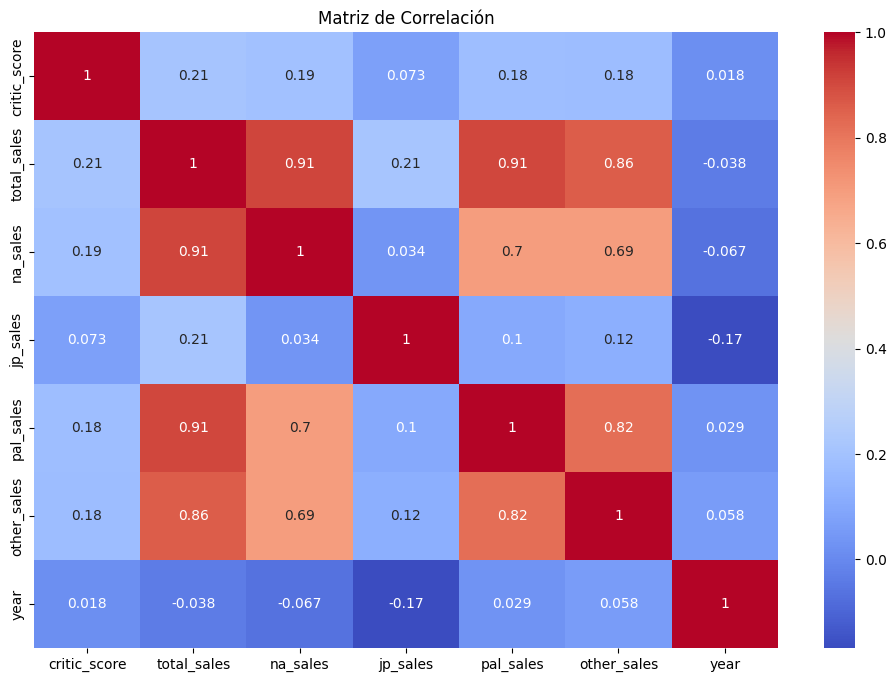

In [43]:
# Matriz de correlación
# Filtra solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcula la matriz de correlación
correlacion = df_numeric.corr()

# Grafica la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['critic_score', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']] 
y = df['total_sales']

# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hace predicciones
predicciones = modelo.predict(X_test)

print(predicciones)


[3.08130909e-04 6.50184943e-01 5.04486463e-02 ... 2.50257663e-01
 2.10994840e+00 2.30100155e-01]


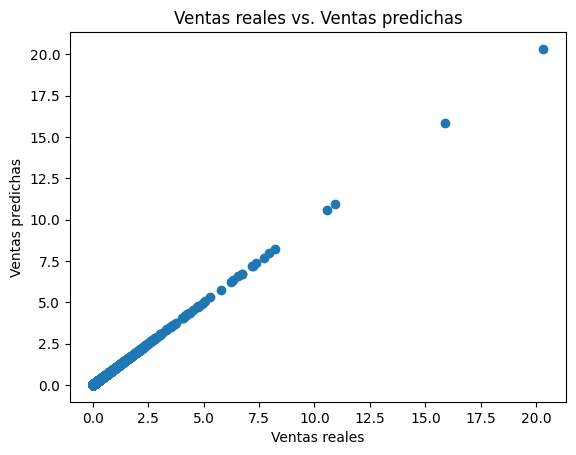

In [25]:
# Crea un gráfico de dispersión
plt.scatter(y_test, predicciones)
plt.xlabel("Ventas reales")
plt.ylabel("Ventas predichas")
plt.title("Ventas reales vs. Ventas predichas")
plt.show()


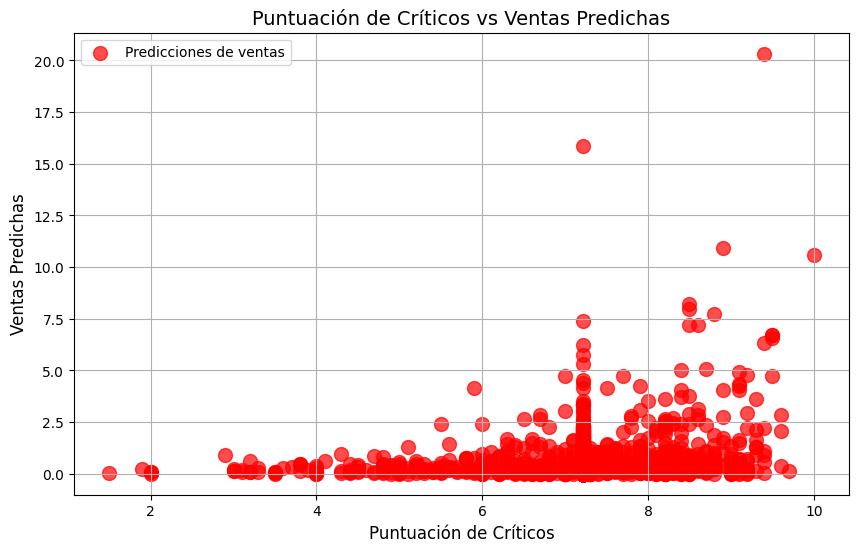

In [27]:
# Tomando a 'critic_score' como una variable de interés y 'predicciones' es el resultado del modelo
plt.figure(figsize=(10, 6))  # Ajusta tamaño de la figura
plt.scatter(X_test['critic_score'], predicciones, color='r', marker='o', s=100, alpha=0.7, label='Predicciones de ventas')  # predicciones en el eje Y
plt.title("Puntuación de Críticos vs Ventas Predichas", fontsize=14)
plt.xlabel("Puntuación de Críticos", fontsize=12)
plt.ylabel("Ventas Predichas", fontsize=12)
plt.legend()
plt.grid(True)  # Agrega cuadrícula
plt.show()
